## Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [3]:
! wget -c https://static.oc-static.com/prod/courses/files/initiez-vous-au-machine-learning/house.csv

--2021-09-07 12:30:31--  https://static.oc-static.com/prod/courses/files/initiez-vous-au-machine-learning/house.csv
Resolving static.oc-static.com (static.oc-static.com)... 172.67.169.198, 104.21.27.218, 2606:4700:3031::ac43:a9c6, ...
Connecting to static.oc-static.com (static.oc-static.com)|172.67.169.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4941 (4.8K) [application/octet-stream]
Saving to: ‘house.csv’

house.csv           100%[===================>]   4.83K  --.-KB/s    in 0s      

2021-09-07 12:30:31 (33.3 MB/s) - ‘house.csv’ saved [4941/4941]



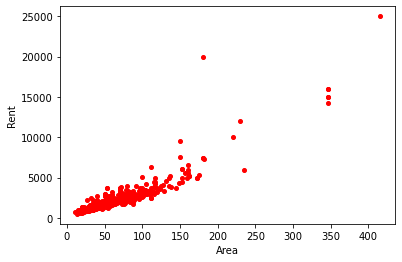

In [10]:
house_data = pd.read_csv('house.csv')

# Display point cloud
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)
plt.xlabel("Area")
plt.ylabel("Rent")
plt.show()

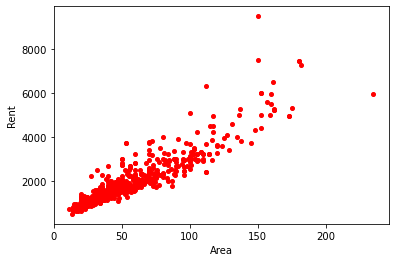

In [12]:
house_data = house_data[house_data['loyer'] < 10000]

# Display point cloud
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)
plt.xlabel("Area")
plt.ylabel("Rent")
plt.show()

## Model

In [13]:
# We decompose the dataset and transform into matrices to compute
# Then, we get the transpose of these matrices
# θ^ = (XTX)−1XTy (allows to find theta which minimizes the loss function)
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface'].values]).T
y = np.matrix(house_data['loyer']).T

# Finally, we compute the exact value of the parameter theta (aka the area)
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta)

[[266.45460292]
 [ 30.66119596]]


**Equation of the Line**
Rent = 30.66 * Area + 266.45

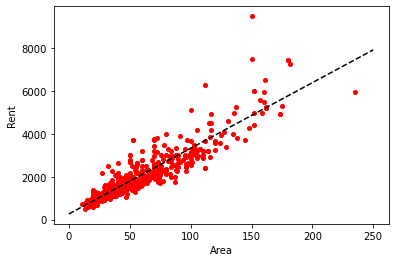

In [14]:
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)
plt.xlabel("Area")
plt.ylabel("Rent")

# We display the line between 0 and 250 m² of area
plt.plot([0,250], [theta.item(0),theta.item(0) + 250 * theta.item(1)], linestyle='--', c='#000000')

plt.show()

## Predictions

In [15]:
# Estimation of the rent for an area of 35 m²
theta.item(0) + theta.item(1) * 35

1339.5964615602247

In [16]:
# Estimation of the rent for an area of 122 m²
theta.item(0) + theta.item(1) * 122

4007.120510192503